In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns
from matplotlib_venn import venn2, venn2_circles

## Overlap of peaks detected by Proteintech and FLAG antibodies

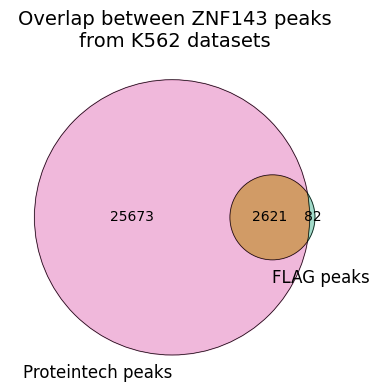

In [2]:
plt.figure(figsize = (4, 4))
plt.title('Overlap between ZNF143 peaks\nfrom K562 datasets', fontsize = 14)
v = venn2([25673, 82, 2621], ('Proteintech peaks', 'FLAG peaks'), alpha = 0.6)
c = venn2_circles([25673, 82, 2621], lw = 0.5)
v.get_patch_by_id('10').set_color('#E78AC3')
v.get_patch_by_id('01').set_color('#66C2A5')

plt.tight_layout()
plt.show()

## Motifs enrichment

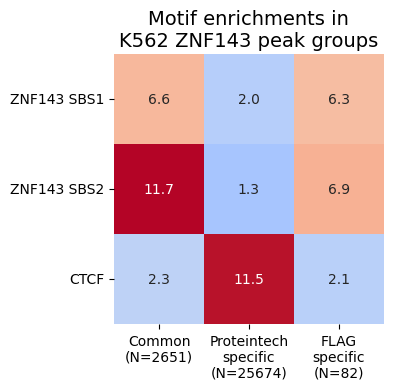

In [3]:
enrichments = pd.DataFrame()
common = pd.read_csv('./k562_data/motifs_enrichment_peaks_common.txt')
enrichments['motifs'] = common['V1']
enrichments['common'] = common['V2']/common['V3']
znf143 = pd.read_csv('./k562_data/motifs_enrichment_peaks_znf143.txt')
enrichments['znf143'] = znf143['V2']/znf143['V3']
flag = pd.read_csv('./k562_data/motifs_enrichment_peaks_flag.txt')
enrichments['flag'] = flag['V2']/flag['V3']

plt.figure(figsize = (3.5, 3.5))
plt.title('Motif enrichments in\nK562 ZNF143 peak groups', fontsize = 14)
sns.heatmap(enrichments.drop(['motifs'], axis = 1), annot = True, fmt = '.1f',
            cmap = 'coolwarm', cbar = 0, center = 4, square = True,
            xticklabels = ['Common\n(N=2651)', 'Proteintech\nspecific\n(N=25674)', 'FLAG\nspecific\n(N=82)'],
            yticklabels = ['ZNF143 SBS1', 'ZNF143 SBS2', 'CTCF'])
plt.yticks(rotation = 0)
plt.show()